In [29]:
! "c:/Users/Fatma CHAHED/AppData/Local/Programs/Python/Python311/python.exe" -m pip install pymongo



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
from pymongo import MongoClient
print("✅ pymongo fonctionne !")


✅ pymongo fonctionne !


In [4]:
import os
from pymongo import MongoClient
import pandas as pd

# Détection automatique de l'environnement
if os.environ.get("DOCKER_ENV", None):
    # à l'intérieur du conteneur
    mongo_uri = os.getenv("MONGO_URI", "mongodb://mongodb:27017")
else:
    # depuis Windows local
    mongo_uri = "mongodb://localhost:27017"

mongo_db = os.getenv("MONGO_DB", "toxic_news")

client = MongoClient(mongo_uri)
db = client[mongo_db]
collection = db["articles"]

data = list(collection.find())
df = pd.DataFrame(data)
df.head()


,_id,site,url,title,content,published_at,fetched_at,metadata
0,6912ff7be807084e4c8ed991,gamespot.com,https://www.gamespot.com/articles/flow-best-an...,Criterion's 4K Blu-Ray Edition Of Flow Is 50% ...,Criterion's 4K Blu-Ray Edition Of Flow Is 50% ...,2025-11-11 07:01:00,2025-11-11 09:18:51.989,{'source_feed': 'https://www.gamespot.com/feed...
1,6912ff7de807084e4c8ed992,gamespot.com,https://www.gamespot.com/gallery/games-like-ge...,18 Games Like Genshin Impact To Lose Yourself ...,18 Games Like Genshin Impact To Lose Yourself ...,2025-11-11 06:46:00,2025-11-11 09:18:53.019,{'source_feed': 'https://www.gamespot.com/feed...
2,6912ff85e807084e4c8ed993,gamespot.com,https://www.gamespot.com/gallery/best-witcher-...,Best Witcher 3 Mods To Download In 2025,Best Witcher 3 Mods To Download In 2025\nGameS...,2025-11-11 06:13:00,2025-11-11 09:19:01.072,{'source_feed': 'https://www.gamespot.com/feed...
3,6912ff85e807084e4c8ed994,gamespot.com,https://www.gamespot.com/articles/lego-dc-batm...,Lego DC Batman Figure & Bat-Pod Is Over 50% Of...,Lego DC Batman Figure & Bat-Pod Is Over 50% Of...,2025-11-11 03:31:00,2025-11-11 09:19:01.497,{'source_feed': 'https://www.gamespot.com/feed...
4,6912ff86e807084e4c8ed995,gamespot.com,https://www.gamespot.com/articles/the-hunger-g...,Sunrise On The Reaping New Collector's Gift Ed...,Sunrise On The Reaping New Collector's Gift Ed...,2025-11-11 01:31:00,2025-11-11 09:19:02.826,{'source_feed': 'https://www.gamespot.com/feed...


In [ ]:
# Informations de base
print(f"Nombre total d'articles : {len(df)}")
print(f"Période couverte : {df['published_at'].min()} à {df['published_at'].max()}")
print(f"Sites sources : {df['site'].nunique()}")

Nombre total d'articles : 264
Période couverte : 2025-10-13 05:30:00 à 2025-11-10 17:15:24
Sites sources : 4


In [ ]:
print(df['site'].value_counts())

site
lepoint.fr       115
lemonde.fr       113
gamespot.com      25
mediacites.fr     11
Name: count, dtype: int64


In [ ]:
df.columns

Index(['_id', 'site', 'url', 'title', 'content', 'published_at', 'fetched_at',
       'metadata'],
      dtype='object')

In [ ]:
df['content']

0      If You Liked Doom’s Heavy Metal Soundtrack, Mi...
1      Best Third-Party PS5 Pro Controller Is On Sale...
2      Pokemon TCG New Mega Lucario Ex Figure Collect...
3      Pokemon 3D Model Kits Drop To $15 With Limited...
4      Grab Criterion's Godzilla 15-Film Collection F...
                             ...                        
259    -\nAjouter à mes favoris\nL'article a été ajou...
260    -\nAjouter à mes favoris\nL'article a été ajou...
261    -\nAjouter à mes favoris\nL'article a été ajou...
262    -\nAjouter à mes favoris\nL'article a été ajou...
263    -\nAjouter à mes favoris\nL'article a été ajou...
Name: content, Length: 264, dtype: object

In [ ]:
print(df['published_at'].value_counts())

published_at
2025-11-09 08:00:00    3
2025-11-08 15:00:00    3
2025-11-09 10:00:00    3
2025-11-10 05:30:00    2
2025-11-08 10:00:00    2
                      ..
2025-11-09 12:00:00    1
2025-11-09 10:36:00    1
2025-11-09 10:02:00    1
2025-11-09 09:00:00    1
2025-10-13 05:30:00    1
Name: count, Length: 253, dtype: int64


In [ ]:
df['content'].isnull().sum()

0

In [ ]:
from textblob import TextBlob
import nltk

# Sentiment de base
df['sentiment'] = df['content'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df['subjectivity'] = df['content'].apply(lambda x: TextBlob(str(x)).sentiment.subjectivity)

# Distribution par site
df.groupby('site')['sentiment'].describe()

,count,mean,std,min,25%,50%,75%,max
site,,,,,,,,
gamespot.com,25.0,0.087965,0.075873,-0.085825,0.062430,0.081775,0.154989,0.219805
lemonde.fr,113.0,0.049831,0.182020,-0.675000,0.000000,0.000000,0.136364,0.600000
lepoint.fr,115.0,0.176196,0.229602,-0.333333,0.010985,0.126736,0.302507,0.734375
mediacites.fr,11.0,0.127035,0.174159,-0.002500,0.000000,0.033333,0.187965,0.500000


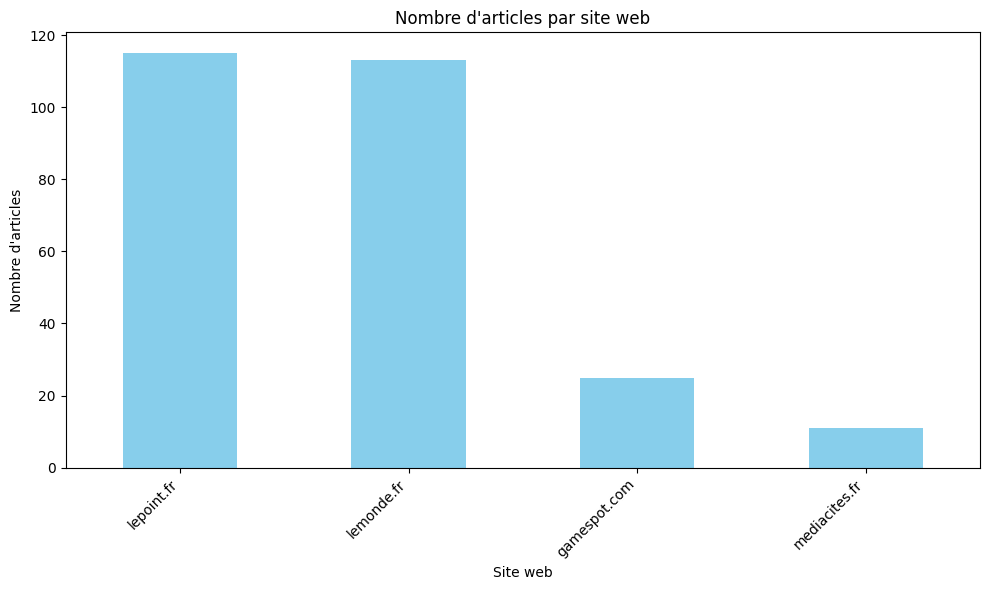

In [ ]:
import matplotlib.pyplot as plt

if 'site' in df.columns:
    site_counts = df['site'].value_counts()
    plt.figure(figsize=(10, 6))
    site_counts.plot(kind='bar', color='skyblue')
    plt.title("Nombre d'articles par site web")
    plt.xlabel("Site web")
    plt.ylabel("Nombre d'articles")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ La colonne 'site' n'existe pas dans le DataFrame.")

In [32]:
df['content_length'] = df['content'].str.len()
df['word_count'] = df['content'].str.split().str.len()

# Agrégation par période
df['date'] = pd.to_datetime(df['published_at']).dt.date
df['week'] = pd.to_datetime(df['published_at']).dt.isocalendar().week

daily_stats = df.groupby('date').agg({
    'sentiment': 'mean',
    'word_count': 'mean',
    'url': 'count'
}).rename(columns={'url': 'article_count'})
daily_stats

,sentiment,word_count,article_count
date,,,
2025-10-13,-0.333333,971.000000,1
2025-10-20,0.029545,705.000000,1
2025-10-24,0.192188,305.000000,1
2025-10-26,0.169643,539.000000,1
2025-10-27,0.001023,928.500000,2
2025-10-28,0.000000,741.000000,1
2025-11-03,-0.079911,645.500000,2
2025-11-04,0.217417,578.250000,4
2025-11-05,0.070069,329.857143,7
